In [8]:
# We'll start by reading in the corpus, which preserves word order
import pandas as pd

clean_corpus = pd.read_pickle('corpus.pkl')
clean_corpus

,trans,Full Name
ali,ladies and gentlemen please welcome to the sta...,Ali Wong
anthony,thank you thank you thank you san francisco th...,Anthony Hopps
bill,all right thank you thank you very much thank...,Bill Murray
louis,introfade the music out lets roll hold there l...,CK Louis
dave,this is dave he tells dirty jokes for a living...,Dave Chapplle
jim,ladies and gentlemen please welcome to the ...,Jim Morrison
joe,ladies and gentlemen welcome joe rogan wha...,Joe Slogan
john,armed with boyish charm and a sharp wit the fo...,John Lennon
mike,wow hey thank you thanks thank you guys hey se...,Mike Rogan


In [9]:
from textblob import TextBlob as tb

polarity = lambda x: tb(x).sentiment.polarity
subjectivity = lambda x: tb(x).sentiment.subjectivity

clean_corpus['polarity'] = clean_corpus['trans'].apply(polarity)
clean_corpus['subjectivity'] = clean_corpus['trans'].apply(subjectivity)

clean_corpus

,trans,Full Name,polarity,subjectivity
ali,ladies and gentlemen please welcome to the sta...,Ali Wong,0.067153,0.481948
anthony,thank you thank you thank you san francisco th...,Anthony Hopps,0.046940,0.565066
bill,all right thank you thank you very much thank...,Bill Murray,0.008603,0.543833
louis,introfade the music out lets roll hold there l...,CK Louis,0.050664,0.523300
dave,this is dave he tells dirty jokes for a living...,Dave Chapplle,-0.005775,0.517545
jim,ladies and gentlemen please welcome to the ...,Jim Morrison,0.039564,0.537553
joe,ladies and gentlemen welcome joe rogan wha...,Joe Slogan,0.075087,0.536834
john,armed with boyish charm and a sharp wit the fo...,John Lennon,0.073923,0.489658
mike,wow hey thank you thanks thank you guys hey se...,Mike Rogan,0.083414,0.526270


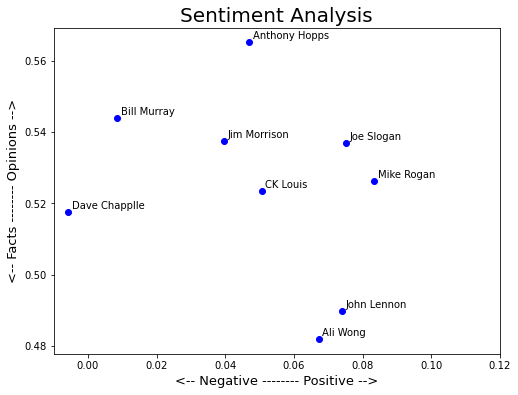

In [10]:
# Let's plot the results
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [8, 6]

for index, comedian in enumerate(clean_corpus.index):
    x = clean_corpus.polarity.loc[comedian]
    y = clean_corpus.subjectivity.loc[comedian]
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001, clean_corpus['Full Name'][index], fontsize=10)
    plt.xlim(-.01, .12) 
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=13)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=13)

plt.show()

In [13]:
# Split each routine into 10 parts
import numpy as np
import math

def split_text(text, n=10):
    length = len(text)
    size = math.floor(length/n)
    
    split_list = []
    for pieces in range(n):
        split_list.append(text[start[pieces]:start[pieces] + size])
        return split_list

# Inference-
we can see how Ali wong and John are positive and very much fact based! While Anthony is very opinionated and Nuetral. Dave and Bill seem to linger on negative spectrum overall throughout their routine.